In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 13 18:59:45 2021

@author: leodefaria
"""

## Importação de bibliotecas

In [ ]:
# from urllib.request import urlopen
# from urllib.error import HTTPError
# from urllib.error import URLError
# import ssl
import pandas as pd
# from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importação de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Vacinados

# base original: DADOS ABERTOS - Registros de Vacinação COVID19 - UF: DF
# https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-06-12/uf%3DDF/part-00000-e7b5a3a9-bb01-40f5-aa63-d3bd2cfe2507.c000.csv

# df_vacina = pd.read_csv('/Users/leodefaria/Documents/IDP/dados/part-00000-e7b5a3a9-bb01-40f5-aa63-d3bd2cfe2507.c000.csv', sep=';')
df_vacina_BaseBruta = pd.read_csv('/content/drive/MyDrive/Trabalho/part-00000-e7b5a3a9-bb01-40f5-aa63-d3bd2cfe2507.c000.csv', sep=';')


In [ ]:
 df_vacina = df_vacina_BaseBruta

In [ ]:
# Conferencias gerais

# df_vacina.dtypes
# df_vacina.shape
# df_vacina.info()
# df_vacina.isna()
# df_vacina.describe()

In [ ]:
# População por faixas

# Base Original: IBGE - Projeção Municípios
# https://www.ibge.gov.br/apps/populacao/projecao/index.html

# df_IBGE_F = pd.read_csv('/Users/leodefaria/Documents/IDP/dados/DF - Fx_IdadeM.csv', sep=';')
# df_IBGE_M = pd.read_csv('/Users/leodefaria/Documents/IDP/dados/DF - Fx_IdadeH.csv', sep=';')

df_IBGE_F = pd.read_csv('/content/drive/MyDrive/Trabalho/DF - Fx_IdadeM.csv', sep=';')
df_IBGE_M = pd.read_csv('/content/drive/MyDrive/Trabalho/DF - Fx_IdadeH.csv', sep=';')


In [ ]:
df_IBGE_M.shape

## Ajuste IBGE

In [8]:
# Separaçao dos dados de 2020 e 2021

# Feminino
df_IBGE_F.drop(df_IBGE_F.columns[1:12], inplace=True, axis=1)
df_IBGE_F.drop(df_IBGE_F.columns[2:], inplace=True, axis=1)

df_IBGE_F.rename(columns={'Faixa/Ano':'faixa',
                         '2021':'Pop_DF'}, inplace=True)


# Masculino
df_IBGE_M.drop(df_IBGE_M.columns[1:12], inplace=True, axis=1)
df_IBGE_M.drop(df_IBGE_M.columns[2:], inplace=True, axis=1)
df_IBGE_M.rename(columns={'Faixa/Ano':'faixa',
                         '2021':'Pop_DF'}, inplace=True)
#df_IBGE_M.drop('Total')

df_IBGE_M.head()


,faixa,Pop_DF
0,Total,1485920
1,0-4,105742
2,5-9,98144
3,10-14,102450
4,15-19,120334


## Ajustes VACINA

In [9]:
# apagando colunas desnecessárias para análise

df_vacina.drop(df_vacina.columns[0:2], inplace=True, axis=1)    # Idade
df_vacina.drop(df_vacina.columns[1], inplace=True, axis=1)      # sexo
df_vacina.drop(df_vacina.columns[2:13], inplace=True, axis=1)   # local_vacina
df_vacina.drop(df_vacina.columns[3:7], inplace=True, axis=1)    # grupoAtendimento
df_vacina.drop(df_vacina.columns[4], inplace=True, axis=1)      # categoria
df_vacina.drop(df_vacina.columns[5:9], inplace=True, axis=1)    # dose
df_vacina.drop(df_vacina.columns[6], inplace=True, axis=1)      # vacina
df_vacina.drop(df_vacina.columns[7:], inplace=True, axis=1)     # resto

# Ajustando nomes colunas

df_vacina.rename(columns={  'paciente_idade':'idade'
                          , 'paciente_enumsexobiologico':'sexo'
                          , 'estalecimento_nofantasia':'local_vacinacao'
                          , 'vacina_grupoatendimento_nome':'grupo_atendimento'
                          , 'vacina_categoria_nome':'vacina_categoria'
                          , 'vacina_descricao_dose':'dose'}, inplace=True)

In [10]:
# Verificação de NAN

df_vacina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975480 entries, 0 to 975479
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   idade              975480 non-null  int64 
 1   sexo               975480 non-null  object
 2   local_vacinacao    975480 non-null  object
 3   grupo_atendimento  968588 non-null  object
 4   vacina_categoria   965117 non-null  object
 5   dose               975480 non-null  object
 6   vacina_nome        975480 non-null  object
dtypes: int64(1), object(6)
memory usage: 52.1+ MB


In [11]:
# Ajuste de NAN

df_vacina['grupo_atendimento'].fillna('-',inplace=True)
df_vacina['vacina_categoria'].fillna('-',inplace=True)
df_vacina['vacina_nome'].fillna('-',inplace=True)

df_vacina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975480 entries, 0 to 975479
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   idade              975480 non-null  int64 
 1   sexo               975480 non-null  object
 2   local_vacinacao    975480 non-null  object
 3   grupo_atendimento  975480 non-null  object
 4   vacina_categoria   975480 non-null  object
 5   dose               975480 non-null  object
 6   vacina_nome        975480 non-null  object
dtypes: int64(1), object(6)
memory usage: 52.1+ MB


## Separando DataFrame para 1ª análise: 
### Panorama de vacinação por faixa etária
   

In [12]:
# Separando dataframe para análise

df_vacina_idade = df_vacina[['idade','sexo','dose']]

# limpeza

df_vacina_idade['dose'] = df_vacina_idade['dose'].str.strip() # campo cheio de tabs e espaços


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [26]:
# Inserindo no dataframe o Range de valores de distribuição do IBGE

# ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90+']
campos=labels= ["{0}-{1}".format(i, i + 4) for i in range(0, 95, 5)]
campos[-1] = '90+'

# linhas=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,95,100]
linhas = pd.Series(np.arange(0,100,5))   

df_vacina_idade['faixa'] = pd.cut(x=df_vacina_idade['idade']
                                  , bins=linhas
                                  , labels=campos)


df_vacina_idade#.head()#describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,idade,sexo,dose,faixa
0,59,F,1ª Dose,55-59
1,47,F,1ª Dose,45-49
2,51,F,1ª Dose,50-54
3,45,F,1ª Dose,40-44
4,59,M,1ª Dose,55-59
...,...,...,...,...
975475,66,F,1ª Dose,65-69
975476,70,M,1ª Dose,65-69
975477,76,F,1ª Dose,75-79
975478,65,F,1ª Dose,60-64


In [ ]:
# Campo do inferno que não "pegava" filtro de jeito nenhum

# df_vacina_idade.dose[0]


In [34]:
# separando df por sexo

df_vacina_idade_M = df_vacina_idade[df_vacina_idade['sexo']=='M']
df_vacina_idade_F = df_vacina_idade[df_vacina_idade['sexo']=='F']


del df_vacina_idade_M['sexo']
del df_vacina_idade_F['sexo']

In [35]:
#separando df por dose
df_vacina_idade_M_1d = df_vacina_idade_M[df_vacina_idade_M['dose']=='1ª\xa0Dose']
df_vacina_idade_M_2d = df_vacina_idade_M[df_vacina_idade_M['dose']=='2ª\xa0Dose']

df_vacina_idade_F_1d = df_vacina_idade_F[df_vacina_idade_F['dose']=='1ª\xa0Dose']
df_vacina_idade_F_2d = df_vacina_idade_F[df_vacina_idade_F['dose']=='2ª\xa0Dose']

del df_vacina_idade_M_1d['dose']
del df_vacina_idade_M_2d['dose']

del df_vacina_idade_F_1d['dose']
del df_vacina_idade_F_2d['dose']

In [36]:
# Agregação por faixas (igualar com ibge)
df_vacina_idade_M_1d_AGG = df_vacina_idade_M_1d.groupby(['faixa']).agg('count')
df_vacina_idade_M_2d_AGG = df_vacina_idade_M_2d.groupby(['faixa']).agg('count') 

df_vacina_idade_F_1d_AGG = df_vacina_idade_F_1d.groupby(['faixa']).agg('count')
df_vacina_idade_F_2d_AGG = df_vacina_idade_F_2d.groupby(['faixa']).agg('count') 


df_vacina_idade_M_1d_AGG.rename(columns={'idade':'Dose1'}, inplace=True)
df_vacina_idade_M_2d_AGG.rename(columns={'idade':'Dose2'}, inplace=True)


df_vacina_idade_F_1d_AGG.rename(columns={'idade':'Dose1'}, inplace=True)
df_vacina_idade_F_2d_AGG.rename(columns={'idade':'Dose2'}, inplace=True)

In [37]:
# Merge dos dfs
df_vacina_M = pd.merge(df_vacina_idade_M_1d_AGG, df_vacina_idade_M_2d_AGG, how = 'inner', on = 'faixa')
df_vacina_M = pd.merge(df_vacina_M, df_IBGE_M, how = 'inner', on = 'faixa')

df_vacina_F = pd.merge(df_vacina_idade_F_1d_AGG, df_vacina_idade_F_2d_AGG, how = 'inner', on = 'faixa')
df_vacina_F = pd.merge(df_vacina_F, df_IBGE_F, how = 'inner', on = 'faixa')

In [38]:
# Conversão do df M para valores negativos:

df_vacina_M['Dose1'] = df_vacina_M['Dose1']* -1
df_vacina_M['Dose2'] = df_vacina_M['Dose2']* -1
df_vacina_M['Pop_DF'] = df_vacina_M['Pop_DF']* -1

df_vacina_M.rename(columns={'Dose1':'Dose1_M'
                          , 'Dose2':'Dose2_M'
                          , 'Pop_DF':'Pop_DF_M'}, inplace=True)


# Merge final

df_vacina_Graf001 = pd.merge(df_vacina_M, df_vacina_F,  how = 'inner', on = 'faixa')

In [39]:
# % vacinado
Total_Dose1 = df_vacina_Graf001['Dose1'].agg('sum') + df_vacina_Graf001['Dose1_M'].agg('sum') * -1
Total_Dose2 = df_vacina_Graf001['Dose2'].agg('sum') + df_vacina_Graf001['Dose2_M'].agg('sum') * -1
Total_Pop   = df_vacina_Graf001['Pop_DF'].agg('sum') + df_vacina_Graf001['Pop_DF_M'].agg('sum') * -1
Percent_Vacinado = Total_Dose2 / Total_Pop * 100


print('Dose 1 ')
print(Total_Dose1)
print('\nDose 2 ')
print(Total_Dose2)
print('\nPopulação ')
print(Total_Pop)
print('\n% População ')
print(Percent_Vacinado)


Dose 1 
665744

Dose 2 
307554

População 
3091667

% População 
9.94783720238952


## Gráficos

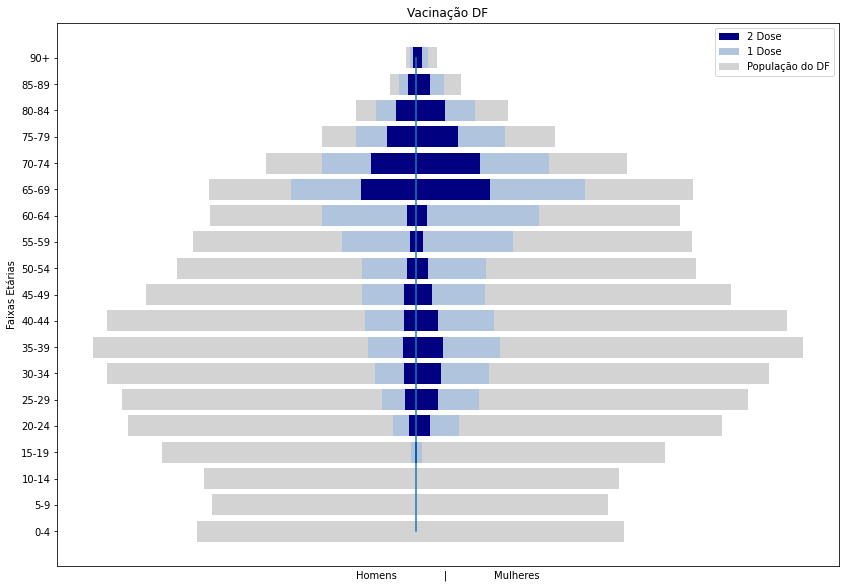

In [40]:
# df_vacina_Graf001

plt.figure(figsize=(14,10))
# Variáveis para plotagem

faixa = df_vacina_Graf001['faixa']

popF =  df_vacina_Graf001['Pop_DF']
Dose1F = df_vacina_Graf001['Dose1']
Dose2F = df_vacina_Graf001['Dose2']

popM =  df_vacina_Graf001['Pop_DF_M']
Dose1M = df_vacina_Graf001['Dose1_M']
Dose2M = df_vacina_Graf001['Dose2_M']


# definições das barras para plotagem
plt.barh(faixa, Dose2F,color='navy')
plt.barh(faixa, Dose1F,color='lightsteelblue', left = Dose2F)
plt.barh(faixa, popF, color='lightgray', left = Dose2F + Dose1F)

plt.barh(faixa, Dose2M,color='navy')
plt.barh(faixa, Dose1M,color='lightsteelblue', left = Dose2M)
plt.barh(faixa, popM, color='lightgray', left = Dose2M + Dose1M)


# Plotagem
plt.ylabel('Faixas Etárias')
plt.xlabel('Homens               |               Mulheres')
plt.title('Vacinação DF')
plt.legend(('2 Dose','1 Dose','População do DF' ))
plt.plot([0,0],[0,18])
plt.xticks([])

plt.show()

In [ ]:
# # Gráfico Vacinaçao Feminino

# plt.figure(figsize=(14,10))

# faixa = df_vacina_F['faixa']
# popM =  df_vacina_F['Pop_DF']
# Dose1 = df_vacina_F['Dose1']
# Dose2 = df_vacina_F['Dose2']

# plt.bar(faixa, Dose2,color='navy')
# plt.bar(faixa, Dose1,color='lightgray', bottom = Dose2)
# plt.bar(faixa, popM, color='lightsteelblue', bottom = Dose2 + Dose1)

# plt.xlabel('Faixas Etárias')
# plt.ylabel('Qtd Pessoas')
# plt.title('Vacinação DF Feminino')
# plt.legend(('2 Dose','1 Dose','População do DF' ))

# plt.show()

In [ ]:
# # Gráfico Vacinaçao Masculino

# plt.figure(figsize=(14,10))

# faixa = df_vacina_M['faixa']
# popM =  df_vacina_M['Pop_DF']
# Dose1 = df_vacina_M['Dose1']
# Dose2 = df_vacina_M['Dose2']

# plt.bar(faixa, Dose2,color='navy')
# plt.bar(faixa, Dose1,color='lightgray', bottom = Dose2)
# plt.bar(faixa, popM, color='lightsteelblue', bottom = Dose2 + Dose1)

# plt.xlabel('Faixas Etárias')
# plt.ylabel('Qtd Pessoas')
# plt.title('Vacinação DF Masculino')
# plt.legend(('2 Dose','1 Dose','População do DF' ))

# plt.show()

## Demais correlações

In [41]:
df_vacina.head()

,idade,sexo,local_vacinacao,grupo_atendimento,vacina_categoria,dose,vacina_nome
0,59,F,UBS 2 SOBRADINHO II,Diabetes Mellitus,Comorbidades,1ª Dose,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
1,47,F,POLICLINICA LAGO SUL,Psicólogo,Trabalhadores de Saúde,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
2,51,F,UBS 01 ASA SUL,Diabetes Mellitus,Comorbidades,1ª Dose,Vacina Covid-19 - Covishield
3,45,F,UBS 01 ASA SUL,Técnico de Enfermagem,Trabalhadores de Saúde,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
4,59,M,UBS 1 SOBRADINHO,Pneumopatias Crônicas Graves,Comorbidades,1ª Dose,Vacina Covid-19 - Covishield


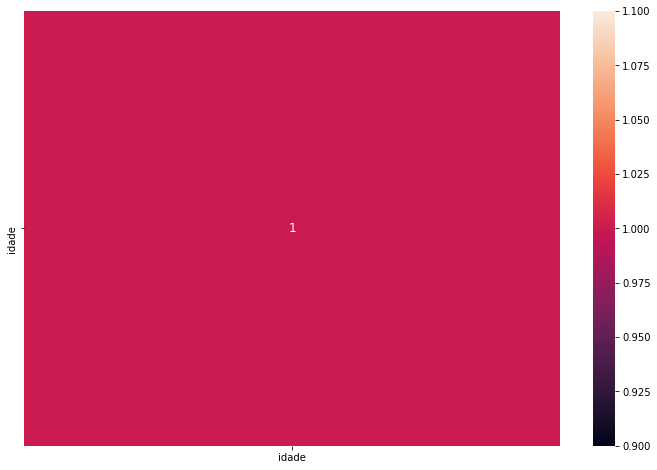

In [42]:
# Apenas uma variável numérica, correlação numérica inexistente
df_corr = df_vacina.corr()

plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, annot_kws={"size": 12})
plt.show()

### Preparando 2 análise


In [43]:
# Limpando o nome da vacina
df_vacina['vacina_nome'] = df_vacina['vacina_nome'].str.replace('Vacina ', '')
df_vacina['vacina_nome'] = df_vacina['vacina_nome'].str.replace('covid-', '')
df_vacina['vacina_nome'] = df_vacina['vacina_nome'].str.replace('Covid-', '')
df_vacina['vacina_nome'] = df_vacina['vacina_nome'].str.replace('19-', '')
df_vacina['vacina_nome'] = df_vacina['vacina_nome'].str.replace('19 - ', '')
df_vacina['vacina_nome'] = df_vacina['vacina_nome'].str.replace('	', '')


df_vacina['vacina_nome'] = df_vacina['vacina_nome'].str.replace('-Sinovac/Butantan', '')
df_vacina['vacina_nome'] = df_vacina['vacina_nome'].str.replace('BNT162b2 - BioNTech/Fosun Pharma/', '')

df_vacina['vacina_nome']

0              Pfizer
1           Coronavac
2          Covishield
3           Coronavac
4          Covishield
             ...     
975475     Covishield
975476      Coronavac
975477     Covishield
975478    AstraZeneca
975479      Coronavac
Name: vacina_nome, Length: 975480, dtype: object

In [44]:
df_vacinaAGG = df_vacina.groupby(['vacina_nome']).agg('count')
df_vacinaAGG#.head(10)

,idade,sexo,local_vacinacao,grupo_atendimento,vacina_categoria,dose
vacina_nome,,,,,,
AstraZeneca,44077,44077,44077,44077,44077,44077
Coronavac,518519,518519,518519,518519,518519,518519
Covishield,374413,374413,374413,374413,374413,374413
Pfizer,38471,38471,38471,38471,38471,38471


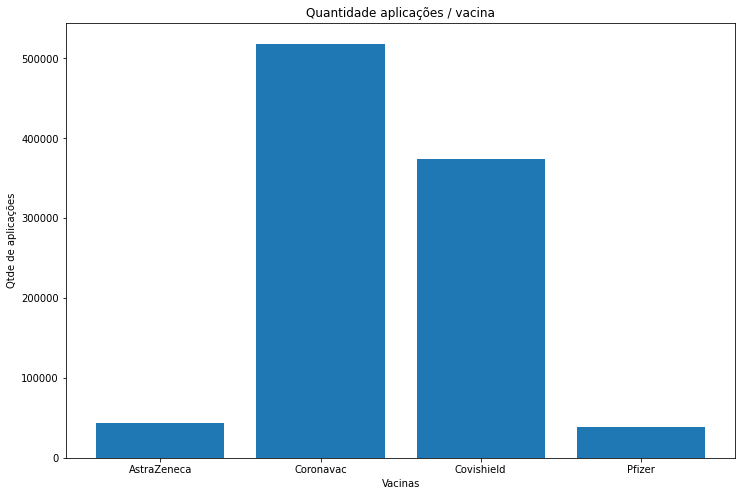

In [45]:
plt.figure(figsize=(12,8))

plt.bar(x=df_vacinaAGG.index
            , height = df_vacinaAGG.idade)

plt.xlabel('Vacinas')
plt.ylabel('Qtde de aplicações')
plt.title('Quantidade aplicações / vacina')
plt.show()

## Macro Categorias

In [46]:
df_vacinaAGGcat = df_vacina.groupby(['vacina_categoria']).agg('count')
df_vacinaAGGcat

,idade,sexo,local_vacinacao,grupo_atendimento,dose,vacina_nome
vacina_categoria,,,,,,
-,10363,10363,10363,10363,10363,10363
Comorbidades,133608,133608,133608,133608,133608,133608
Faixa Etária,532444,532444,532444,532444,532444,532444
Forças Armadas (membros ativos),3703,3703,3703,3703,3703,3703
Forças de Segurança e Salvamento,23112,23112,23112,23112,23112,23112
Funcionário do Sistema de Privação de Liberdade,1277,1277,1277,1277,1277,1277
Pessoas com Deficiência,8330,8330,8330,8330,8330,8330
Pessoas de 60 anos ou mais institucionalizadas,7632,7632,7632,7632,7632,7632
Pessoas em Situação de Rua,41,41,41,41,41,41


In [48]:
df_vacina_categoria = df_vacinaAGGcat.reset_index()

df_vacina_categoria['mac_cat'] = df_vacina_categoria['vacina_categoria']

df_vacina_categoria['mac_cat'] = df_vacina_categoria['mac_cat'].map({
    '-':'Indefinidos',
    'Comorbidades':'Comorbidades',
    'Faixa Etária':'Faixa Etária',
    'Trabalhadores de Saúde':'Trabalhadores de Saúde',
    'Forças Armadas (membros ativos)':'Segurança Publica',
    'Forças de Segurança e Salvamento':'Segurança Publica',
    'Funcionário do Sistema de Privação de Liberdade':'Segurança Publica',
    'Pessoas com Deficiência':'Especiais',
    'Pessoas de 60 anos ou mais institucionalizadas':'Especiais',
    'Pessoas em Situação de Rua':'Especiais',
    'População Privada de Liberdade':'Especiais',
    'Povos Indígenas':'Especiais',
    'Povos e Comunidades Tradicionais':'Especiais',
    'Trabalhadores Industriais':'Trabalhadores Gerais',
    'Trabalhadores Portuários':'Trabalhadores Gerais',
    'Trabalhadores da Educação':'Trabalhadores Gerais',
    'Trabalhadores de Transporte':'Trabalhadores Gerais'})


del df_vacina_categoria['vacina_categoria']
del df_vacina_categoria['sexo'] 
del df_vacina_categoria['local_vacinacao']
del df_vacina_categoria['grupo_atendimento']
del df_vacina_categoria['dose']
del df_vacina_categoria['vacina_nome']



df_vacina_categoria.rename(columns={'idade':'Qtd_aplicacoes'}, inplace=True)

df_vacina_categoria = df_vacina_categoria.groupby(['mac_cat']).agg('sum')


df_vacina_categoria.head(10)#.describe()

,Qtd_aplicacoes
mac_cat,
Comorbidades,133608
Especiais,16472
Faixa Etária,532444
Indefinidos,10363
Segurança Publica,28092
Trabalhadores Gerais,11398
Trabalhadores de Saúde,243103


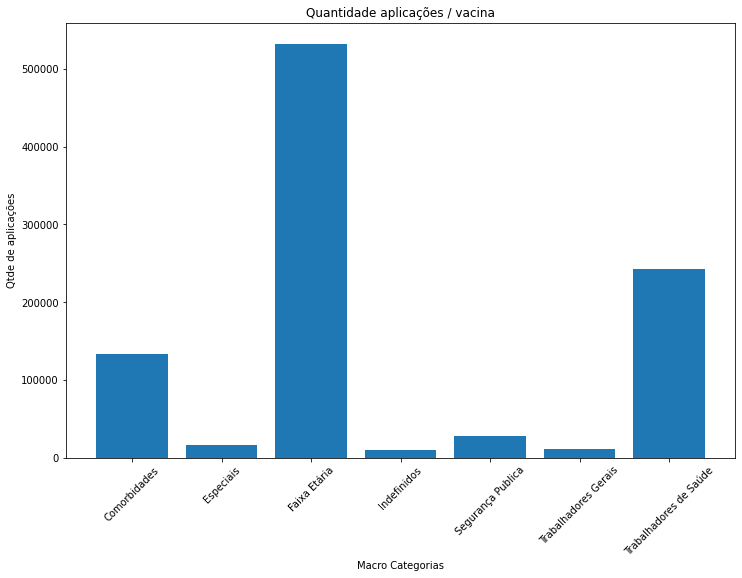

In [49]:
plt.figure(figsize=(12,8))

plt.bar(x=df_vacina_categoria.index
        , height = df_vacina_categoria.Qtd_aplicacoes)


plt.xticks(rotation=45)
plt.xlabel('Macro Categorias')
plt.ylabel('Qtde de aplicações')
plt.title('Quantidade aplicações / vacina')
plt.show()